# Rich learning: How scale and width affect learning

It has been noted previously that wide networks cannot change their internal parameters by a lot. 

/usr/local/anaconda3/envs/bayesian_chaos/lib/python3.9/site-packages/jax/_src/numpy/lax_numpy.py:3302: UserWarning: 'kind' argument to argsort is ignored; only 'stable' sorts are supported.
  warnings.warn("'kind' argument to argsort is ignored; only 'stable' sorts "


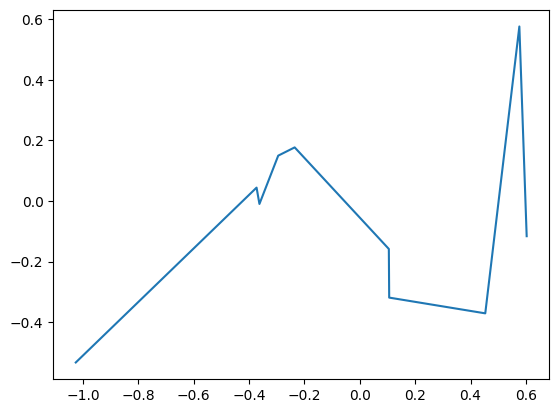

In [4]:
from jax import random
from jax.example_libraries import stax
import matplotlib.pyplot as plt
import numpy as np

init_fn, apply_fn = stax.serial(
    stax.Dense(512), stax.Relu,
    stax.Dense(512), stax.Relu,
    stax.Dense(1)
)

key = random.PRNGKey(1)
x = random.normal(key, (10, 100))
_, params = init_fn(key, input_shape=x.shape)

y = apply_fn(params, x)  # (10, 1) np.ndarray outputs of the neural network

isort = np.argsort(x[:,0])
plt.plot(x[isort,0], y[isort,0])

### Wide, but finite networks

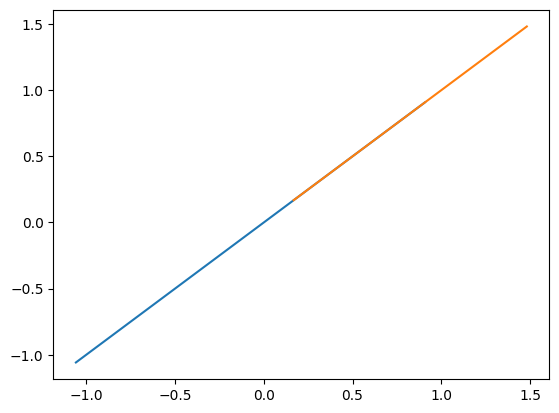

In [5]:
import jax.random as random
import jax.numpy as np
import neural_tangents as nt


def apply_fn(params, x):
  W, b = params
  return np.dot(x, W) + b


W_0 = np.array([[1., 0.], [0., 1.]])
b_0 = np.zeros((2,))
params = (W_0, b_0)

key1, key2 = random.split(random.PRNGKey(1), 2)
x_train = random.normal(key1, (3, 2))
x_test = random.normal(key2, (4, 2))
y_train = random.uniform(key1, shape=(3, 2))

kernel_fn = nt.empirical_kernel_fn(apply_fn)
ntk_train_train = kernel_fn(x_train, None, 'ntk', params)
ntk_test_train = kernel_fn(x_test, x_train, 'ntk', params)
mse_predictor = nt.predict.gradient_descent_mse(ntk_train_train, y_train)

t = 5.
y_train_0 = apply_fn(params, x_train)
y_test_0 = apply_fn(params, x_test)
y_train_t, y_test_t = mse_predictor(t, y_train_0, y_test_0, ntk_test_train)
# (3, 2) and (4, 2) np.ndarray train and test outputs after `t` units of time
# training with continuous gradient descent

isort_tr = np.argsort(x_train[:,0])
plt.plot(x_train[isort_tr,0], y_train_0[isort_tr,0])
isort_ts = np.argsort(x_test[:,0])
plt.plot(x_test[isort_ts,0], y_test_0[isort_ts,0])
